# Fit an existing model

## Select model

Let's play with some scientific useful model. First we import scientific solvers:

In [1]:
from scifit.solvers.scientific import *

And we select some model of interest such as the Hill model which says something like:

$$y = \frac{k \cdot x^n}{1 + k \cdot x^n}$$



In [2]:
solver = HillEquationFitSolver()

## Load data

Now we generate some synthetic dataset for a given problem:

In [3]:
data = solver.synthetic_dataset(
    xmin=0.0, xmax=5.0, resolution=50,
    parameters=[3.75, 0.21],
    sigma=0.1, scale_mode="auto", seed=1234,
)

In [4]:
data.sample(5)

,x0,y,sy,yref,ynoise
id,,,,,
48,4.795918,0.987759,0.049437,0.986855,0.000904
6,0.510204,0.060416,0.049437,0.016558,0.043858
49,4.897959,1.025186,0.049437,0.987841,0.037345
3,0.204082,0.071370,0.049437,0.000542,0.070828
39,3.877551,1.012899,0.049437,0.971290,0.041610


## Solve Fit

Everything is setup, we can solve our problem:

In [5]:
solution = solver.fit(data)

In [6]:
solver.solved()

True

In [7]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [8]:
print(solution["parameters"])

[3.87767573 0.19793709]


In [9]:
print(solution["covariance"])

[[ 0.04232867 -0.00421464]
 [-0.00421464  0.00056318]]


In [10]:
solver.dataset().sample(5)

,x0,y,sy,yhat,yerr,yerrrel,yerrabs,yerrsqr,chi2
id,,,,,,,,,
22,2.142857,0.752964,0.049437,0.791753,-0.038789,-0.048991,0.038789,0.001505,0.615625
28,2.755102,0.813940,0.049437,0.909705,-0.095766,-0.105271,0.095766,0.009171,3.752486
30,2.959184,0.977037,0.049437,0.930029,0.047008,0.050545,0.047008,0.002210,0.904163
39,3.877551,1.012899,0.049437,0.974300,0.038599,0.039617,0.038599,0.001490,0.609614
11,1.020408,0.241544,0.049437,0.176322,0.065222,0.369903,0.065222,0.004254,1.740565


## Render solution

Finally we can render fit and loss function to check the solution quality:

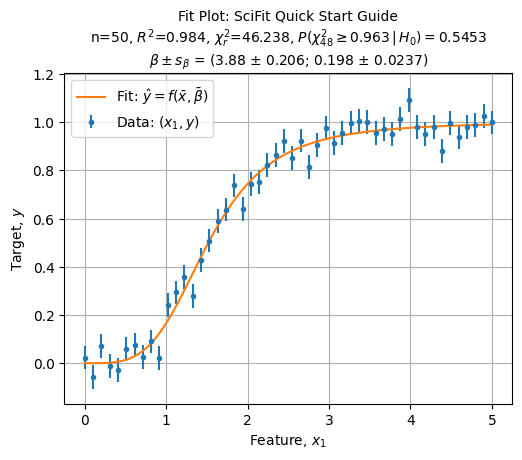

In [11]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

The adjustment is statistically significant:

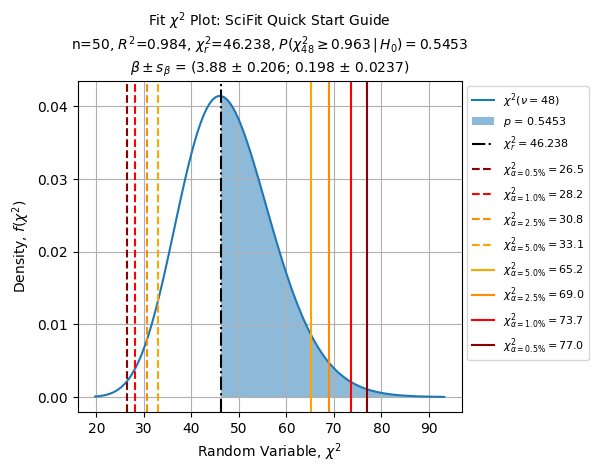

In [12]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

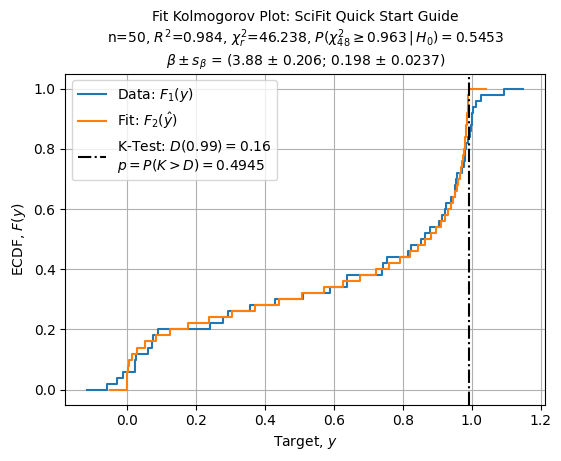

In [13]:
axe = solver.plot_kolmogorov(title="SciFit Quick Start Guide")

Before investigating the error landscape we can define custom parameter domains:

In [14]:
domains = solver.parameter_domains(include_origin=True, include_unit=True)
domains

,0,1
min,0.000000,0.0
max,5.816514,1.0


Loss surface indicates we have found the optimum solution over the domains:

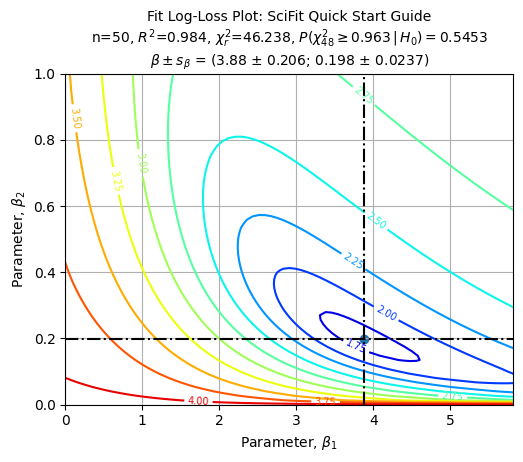

In [15]:
axe = solver.plot_loss(title="SciFit Quick Start Guide", domains=domains, log_loss=True)

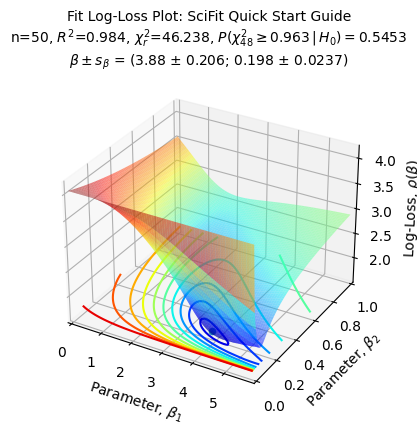

In [16]:
axe = solver.plot_loss(title="SciFit Quick Start Guide", domains=domains, surface=True, log_loss=True)